# Effectiveness of all-weather-trading

| Base  | Trading            | Timing              | yoy - SPY | 10y Gains - SPY | yoy -BRKB | 10y Gains - BRKB |
|-------|--------------------|---------------------|-----------|-----------------|-----------|------------------|
| SPY   | Optimal 60/40      | Optimal Timing      | +3.21%    | 77%             | +1.09%    | 28.3%            |
| BRK-B | Optimal 60/40      | Optimal Timing      | /         |                 | +1.83%    | 49%               |
| SPY   | Optimal 60/40      | 1st downturn Timing | +2.31%    | 53.4%           | +0.19%    | 4.8%             |
| BRK-B | Optimal 60/40      | 1st downturn Timing | /         |                 | +1.16%    | 30%              |
| SPY   | Half success 60/40 | 1st downturn Timing | +2.12%    | 48.6%           | +0.0%     | 0%               |
| BRK-B | Half success 60/40 | 1st downturn Timing | /         |                 | +0.86%    | 22.1%            |


Assumptions:
- timespan = 19 years [2007-2025]
- [SPY] yoy = 8.58%;
- [SPY] 1% added gain = 10y 22% gain, 2% added gain = 10y 45% gain, 3% added gain = 10y 71% gain.
- [BRKB] yoy = 10.64%;
- [BRKB] 1% added gain = 10y 26% gain, 2% added gain = 10y 54% gain, 3% added gain = 10y 84% gain.

Learnings:
- All-weather trading brings a minimum added yoy value of 1-2%.
- Timing is decisive to all-weather trading effectiveness.
  - The "1st downturn timing" strategy, which signals hedged asset trading at the 1st equity valley, grants a 2% baseline.
  - An optimal timing grants an additional 1%.
  - Track live economic events & fiscal / monetary policy changes to determine the stage of the crisis.
- Hedge asset selection is decisive to all-weather trading effectiveness.
  - Watch macro-signals such as inflation closely to determine whether to use TLT or DBC.
- All-weather trading is more significant on non-weather tuned benchmark (SPY 2-3%) compared to benchmarks that might have already considered some weather signals (BRKB 1-2%)

TODO:
- [TODO] How does DCA affect timing gains?
- [TODO] Why does BRKB not benefit from all-weather trading as much as SPY do?

In [46]:
x = 1/100
y=1.83/100
spy=(6728/1409)**(1/19)
brkb = (499/73) ** (1/19)
print((spy+x)**10-spy**10,(brkb+y)**10-brkb**10)
print((spy+1/100)**10-spy**10,(spy+2/100)**10-spy**10, (spy+3/100)**10-spy**10)
print((brkb+1/100)**10-brkb**10,(brkb+2/100)**10-brkb**10, (brkb+3/100)**10-brkb**10)

0.21861877095765347 0.49024447692999074
0.21861877095765347 0.45595074823653414 0.7134064567947083
0.2589104291526847 0.5395553770947323 0.8435417848239797


In [5]:
from adata.stock import Stock
from jinja2.lexer import TOKEN_LTEQ
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from strategy import DollarCostAverageStrategy
from main import *
from logging_config import set_quiet_mode

set_quiet_mode()


### Scenario 1: [2007-2025] optimal 60/40 & optimal timing

Trading Strategy:
- In high risk stage, do 60/40 split. Hedging assets depend on inflation rate (higher inflation, higher DBC allocation). In low risk stage, run 100% equity.
- Sell SPY at the top of each inflation stage for hedging assets
- Switch hedging assets to SPY at their peak.


Trading Techniques:
- Hold up to 30% TLT to hedge against asset inflation slow down. Sell at optimal timing in 08 Crisis (SPY dropped by 50%, TLT rose by 50%).
- Hold up to 10% DBC (max double) to hedge against high macro-inflation. Sell at optimal timing in 08 Crisis (SPY dropped by 25% and DBC rose by 80%).
- Hold US equity as the main holding. Switch to hedging assets at optimal timing in 2022. (SPY dropped by 17%, DBC rose by 50%)

Learnings:
- SPY does not balance out macro-economic cycles, and is with high volatility. **Portfolio** out performs SPY by 3.21% yearly (705% vs 365% in 18 years).
- BRK-B seems to already be covering some factors to mitigate the macro-economic cycles volatility already, and is . "Portfolio" out performs BRK-B by only 1.09% yearly (705% vs 583% in 18 years). Note that **Portfolio** is operating on ideal timeliness.
- To apply the conservative strategy on top of BRK-B (which already adjusted macro cycles). "Portfolio" out performs BRK-B by 1.83% yearly (811% vs 583% in 18 years).

Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-06-30   SELL   DBC      8403     $44.78     $376286.34   $376359.37   DBC:0           (CLIPPED)
         Adjusted to buy 2931 shares instead ($376281.79)
5   2008-07-01   BUY    SPY      2931     $128.38    $376281.79   $77.58       SPY:7175        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


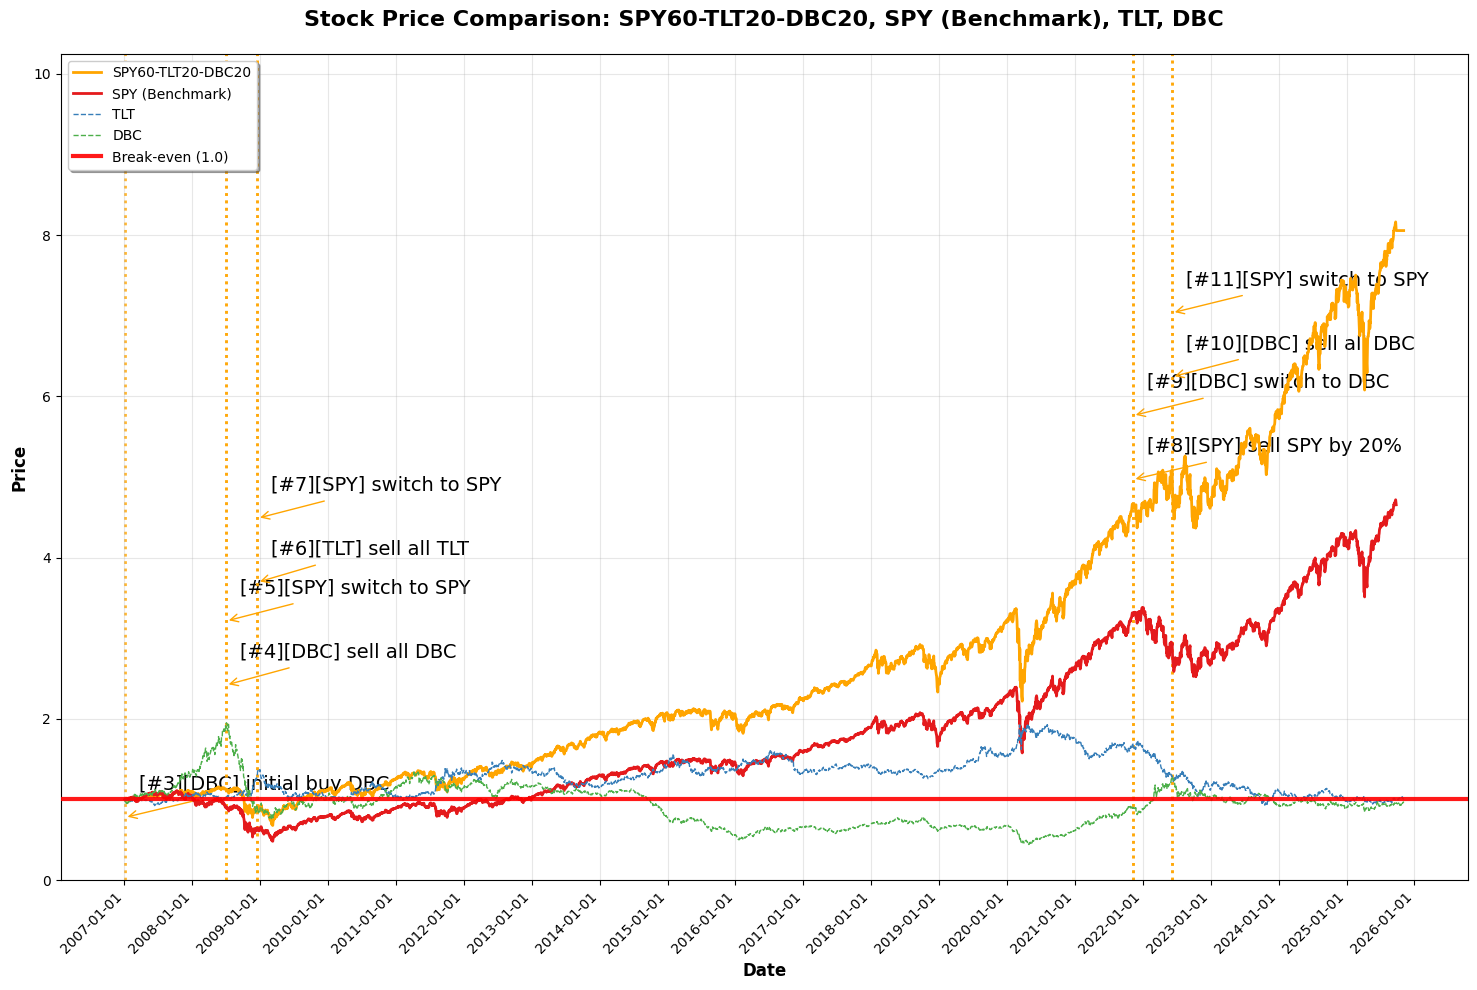

In [7]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-06-30', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-07-01', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-12-15', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-12-16', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-40, date='2021-11-08', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-11-09', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-06-06', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-06-07', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='SPY',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-06-30   SELL   DBC      8403     $44.78     $376286.34   $376359.37   DBC:0           (CLIPPED)
         Adjusted to buy 2931 shares instead ($376281.79)
5   2008-07-01   BUY    SPY      2931     $128.38    $376281.79   $77.58       SPY:7175        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


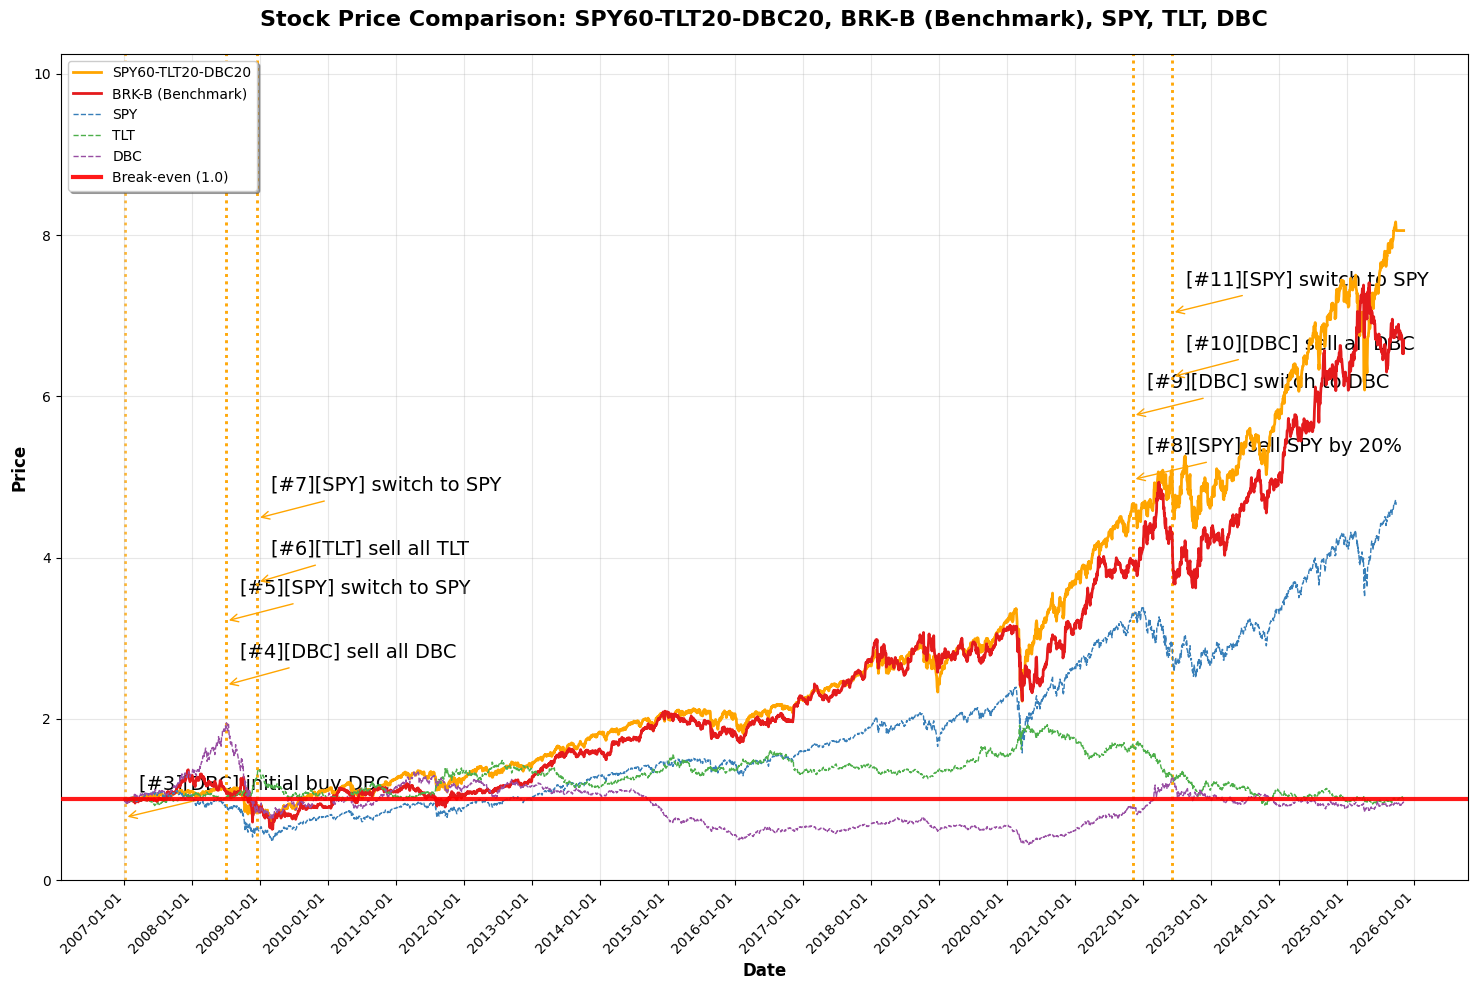

In [8]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-06-30', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-07-01', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-12-15', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-12-16', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-40, date='2021-11-08', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-11-09', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-06-06', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-06-07', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    BRK-B    8234     $72.86     $599929.24   $400070.76   BRK-B:8234     
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200108.61   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $118.05      DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-06-30   SELL   DBC      8403     $44.78     $376286.34   $376404.39   DBC:0           (CLIPPED)
         Adjusted to buy 4706 shares instead ($376385.88)
5   2008-07-01   BUY    BRK-B    4706     $79.98     $376385.88   $18.51       BRK-B:12940     (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


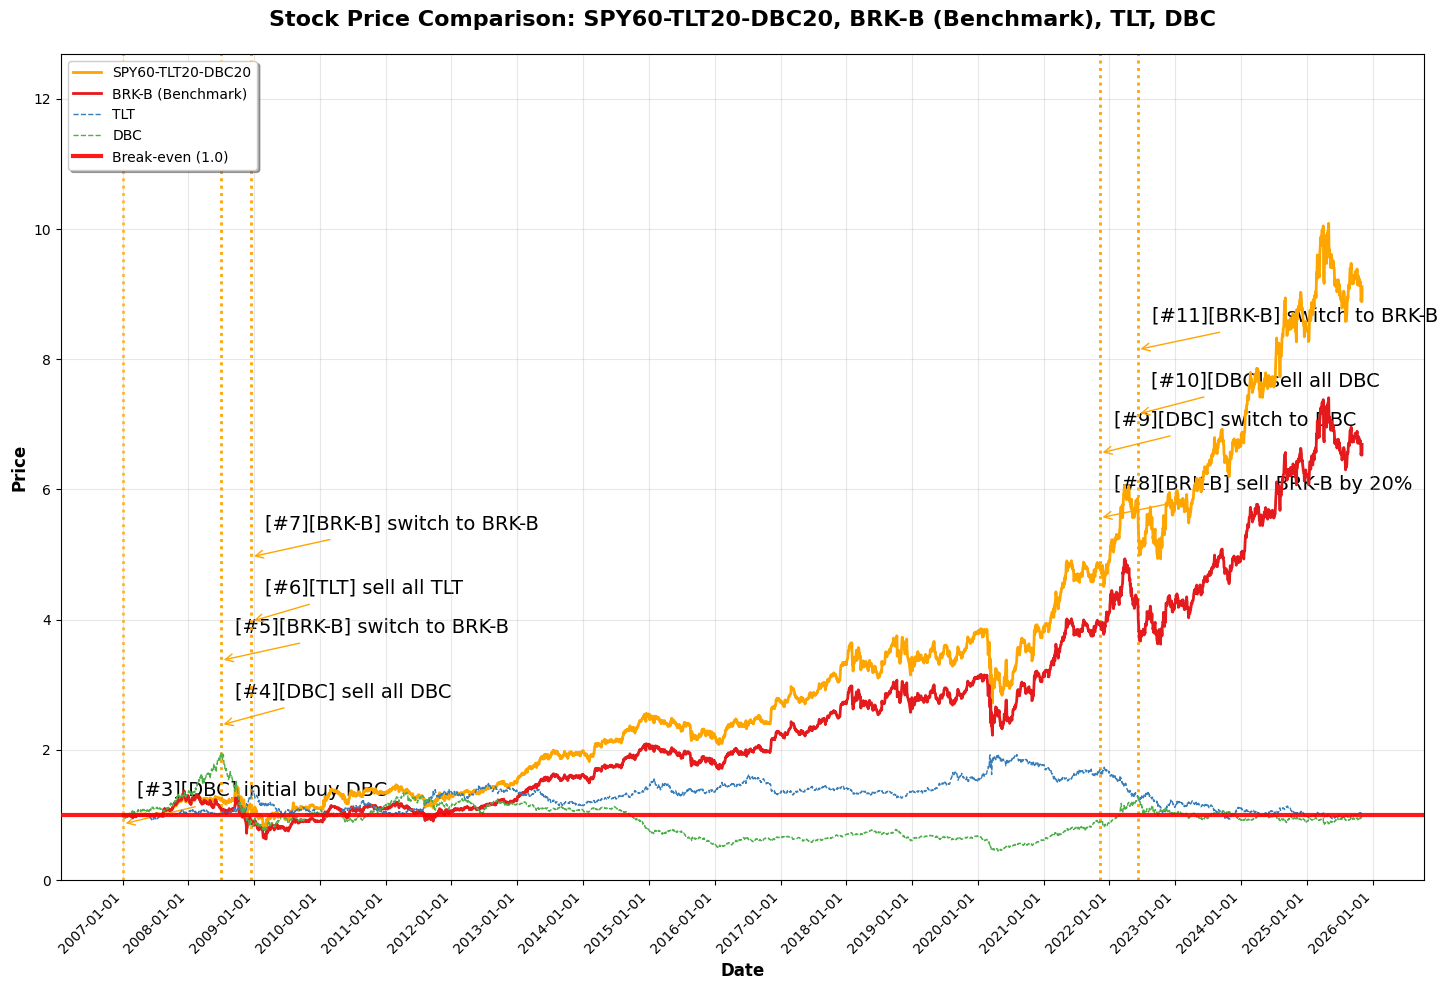

In [16]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-06-30', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-07-01', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-12-15', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-12-16', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-40, date='2021-11-08', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-11-09', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-06-06', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-06-07', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


### Scenario 2: [2007-2025] optimal 60/40 & 1st downturn timing

Trading Strategy:
- In high risk stage, do 60/40 split; In low risk stage, allow portfolio to be equity only.
- When SPY is suspected to be inflated, sell SPY for hedging assets at the half of the inflation stage, if hedging price is low.
- When SPY drops by 20%, start monitoring, if TLT/DBC exhibit risk-avoiding behaviors, switch TLT/DBC to SPY at the first downturn.

Trading Techniques:
- Hold up to 30% TLT to hedge against asset inflation slow down. Sell at half-way to the optimal timing in 08 Crisis (SPY dropped by 40%, TLT rose by 17%).
- Hold up to 10% DBC (max double) to hedge against high macro-inflation. Sell at half-way optimal timing in 08 Crisis (SPY dropped by 25%, DBC rose by 50%).
- Hold US equity as the main holding. Switch to hedging assets at half-way optimal timing.
- Hold 10% IAU

Learnings:
- SPY does not balance out macro-economic cycles, and is with high volatility. **Portfolio** out performs SPY by 2.31% yearly (591% vs 365% in 18 years).
- BRK-B seems to already be covering some factors to mitigate the macro-economic cycles volatility already, and is . "Portfolio" out performs BRK-B by only 0.19% yearly (591% vs 583% in 18 years).
- To apply the conservative strategy on top of BRK-B (which already adjusted macro cycles). "Portfolio" out performs BRK-B by 1.16% yearly (715% vs 583% in 18 years).

Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313841.05   DBC:0           (CLIPPED)
         Adjusted to buy 2348 shares instead ($313763.25)
5   2008-03-18   BUY    SPY      2348     $133.63    $313763.25   $77.80       SPY:6592        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


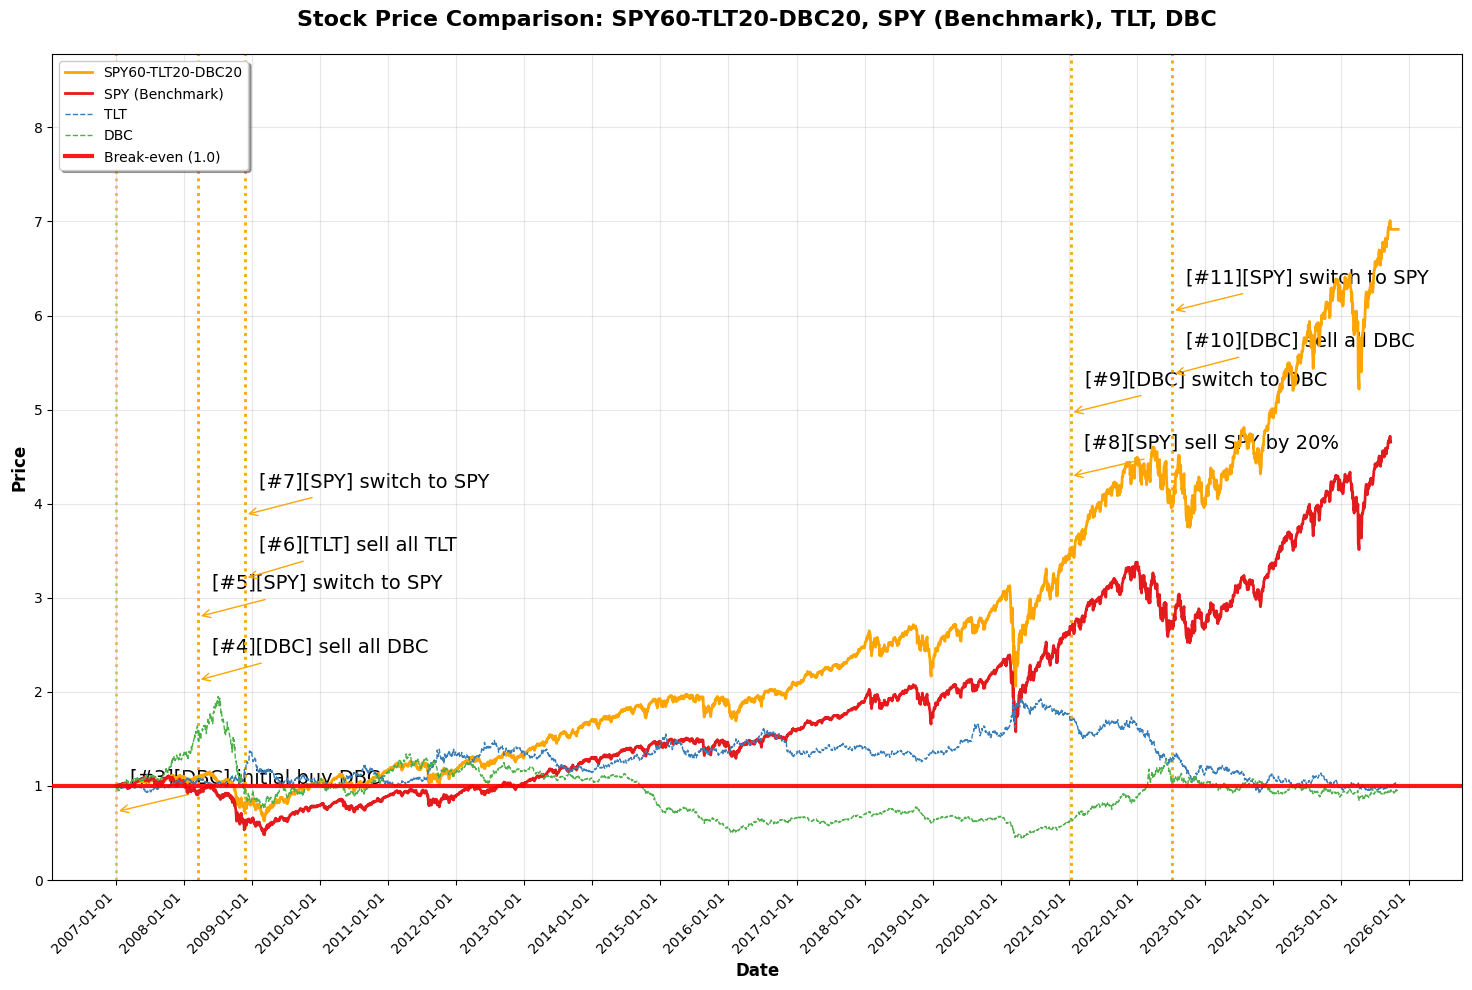

In [10]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='SPY',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313841.05   DBC:0           (CLIPPED)
         Adjusted to buy 2348 shares instead ($313763.25)
5   2008-03-18   BUY    SPY      2348     $133.63    $313763.25   $77.80       SPY:6592        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


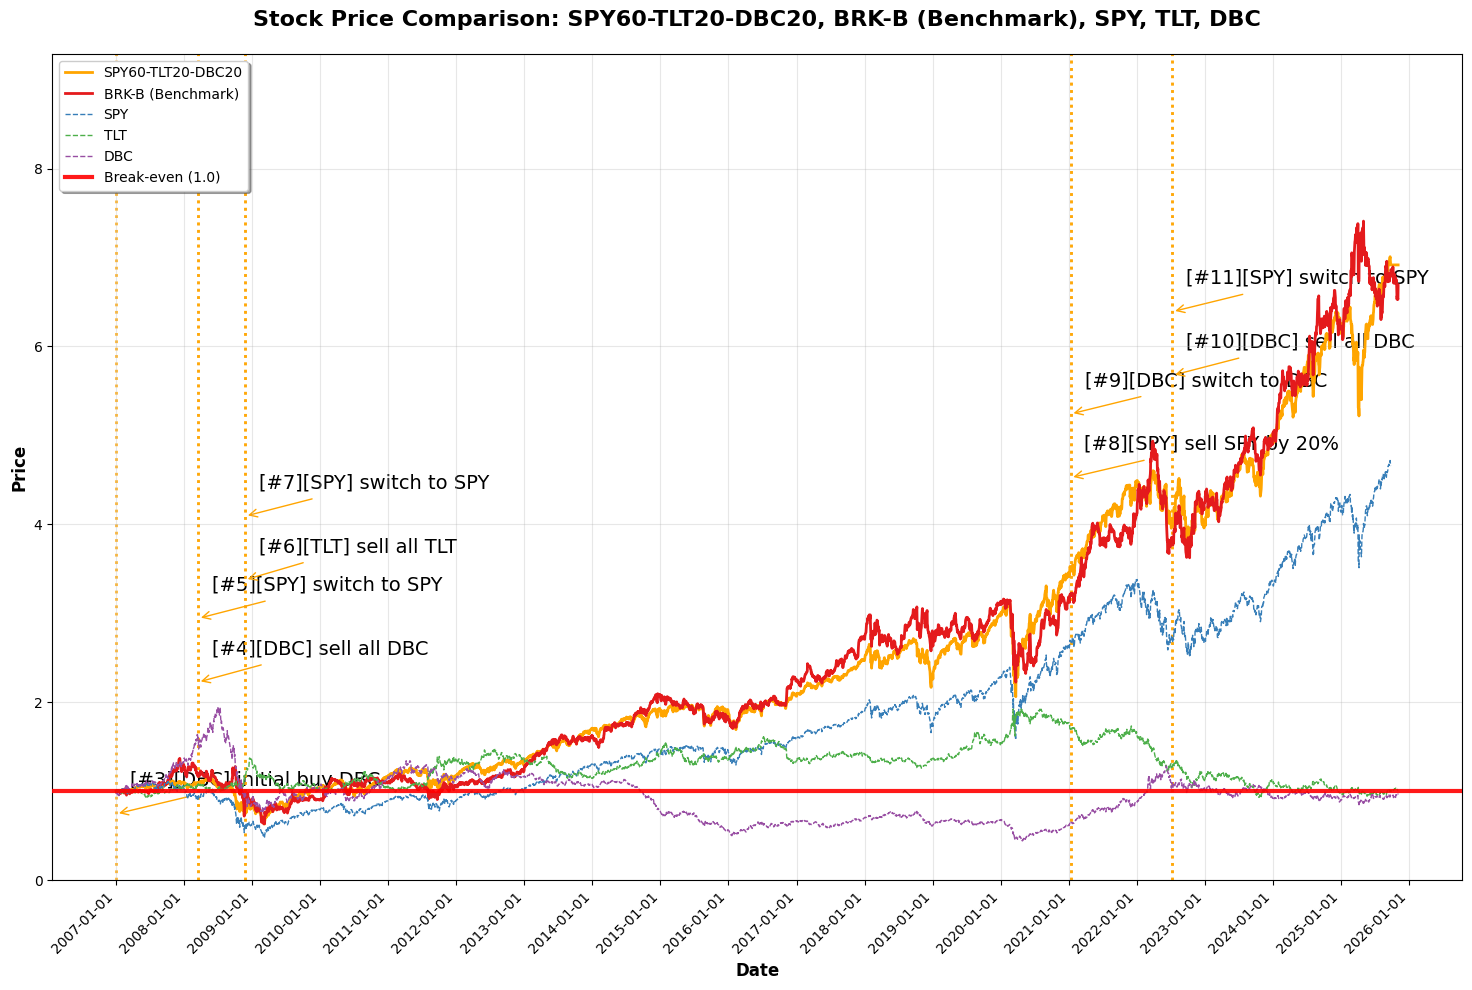

In [11]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    BRK-B    8234     $72.86     $599929.24   $400070.76   BRK-B:8234     
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200108.61   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $118.05      DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313886.07   DBC:0           (CLIPPED)
         Adjusted to buy 3645 shares instead ($313870.95)
5   2008-03-18   BUY    BRK-B    3645     $86.11     $313870.95   $15.12       BRK-B:11879     (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


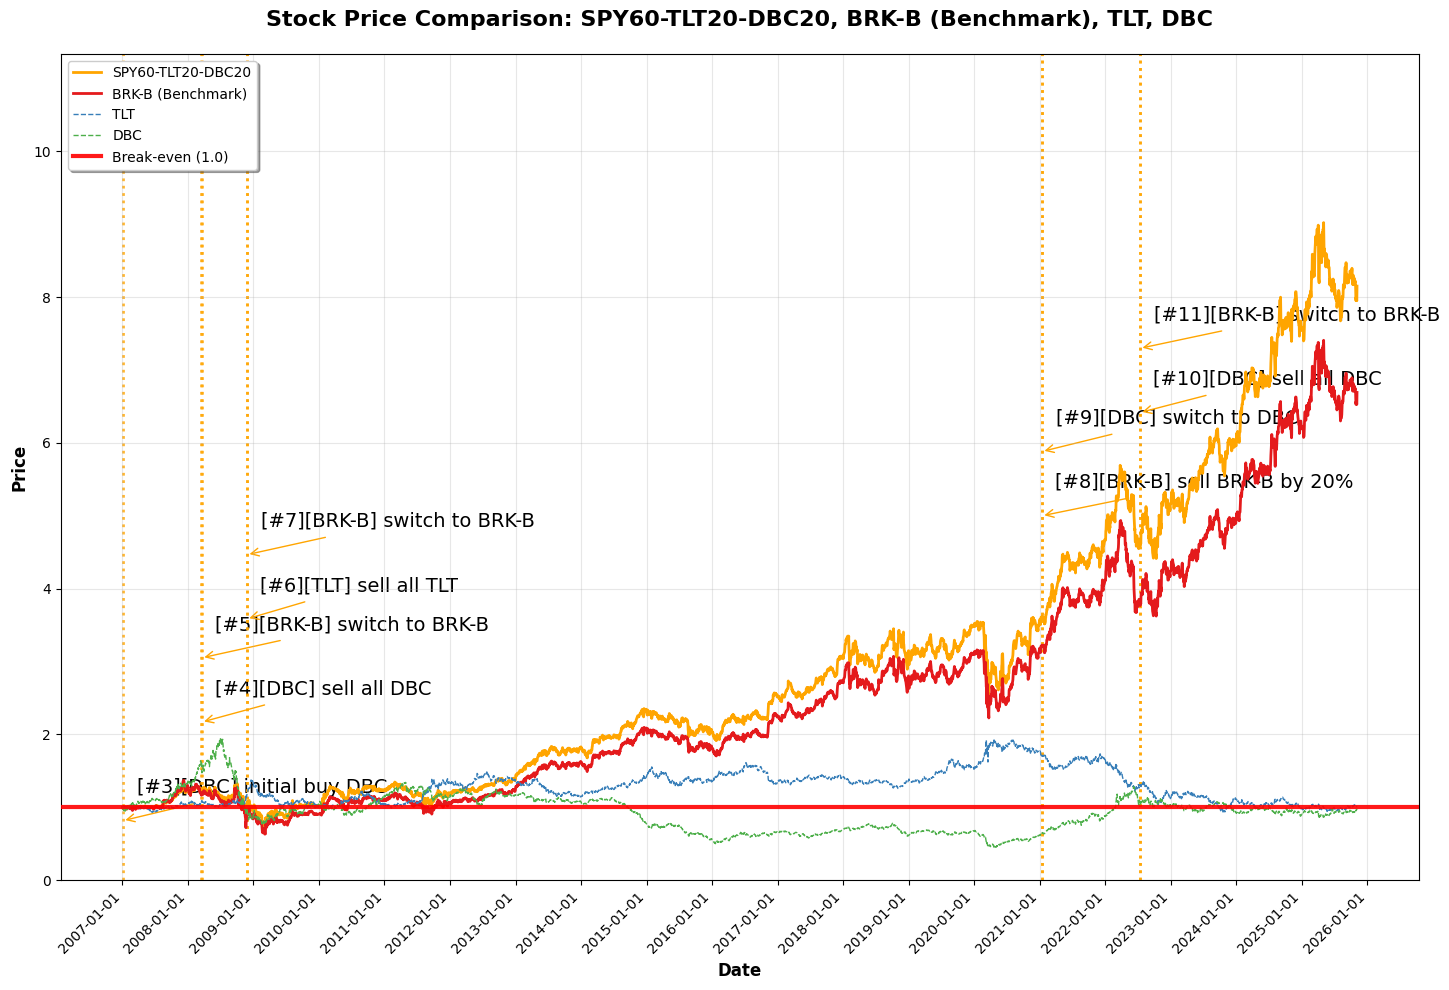

In [12]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


### Scenario 3: [2007-2025] half successful hedging 60/40 & 1st downturn timing

Trading Strategies:
- Equity = 60%; hedging = 40%
- When SPY is suspected to be inflated, sell SPY for hedging assets at the half of the inflation stage, if hedging price is low.
- When SPY drops by 20%, start monitoring, if TLT/DBC exhibit risk-avoiding behaviors, switch TLT/DBC to SPY at the first downturn.

Trading Techniques:
- Hold up to 20% TLT to hedge against asset inflation slow down. Sell at half-way to the optimal timing.
- Hold up to 5% DBC (max double) to hedge against high macro-inflation. Sell at half-way optimal timing.
- Hold US equity as the main holding. Switch to hedging assets at half-way optimal timing.
- Hold 10% IAU

Learnings:
- SPY does not balance out macro-economic cycles, and is with high volatility. **Portfolio** out performs SPY by 2.12% yearly (569% vs 365% in 18 years).
- BRK-B seems to already be covering some factors to mitigate the macro-economic cycles volatility already, and is . "Portfolio" out performs BRK-B by only 0.0% yearly (569% vs 569% in 18 years).
- To apply the conservative strategy on top of BRK-B (which already adjusted macro cycles), only has marginal gains. "Portfolio" out performs BRK-B by only 0.86% yearly (674% vs 583% in 18 years).

Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313841.05   DBC:0           (CLIPPED)
         Adjusted to buy 2348 shares instead ($313763.25)
5   2008-03-18   BUY    SPY      2348     $133.63    $313763.25   $77.80       SPY:6592        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


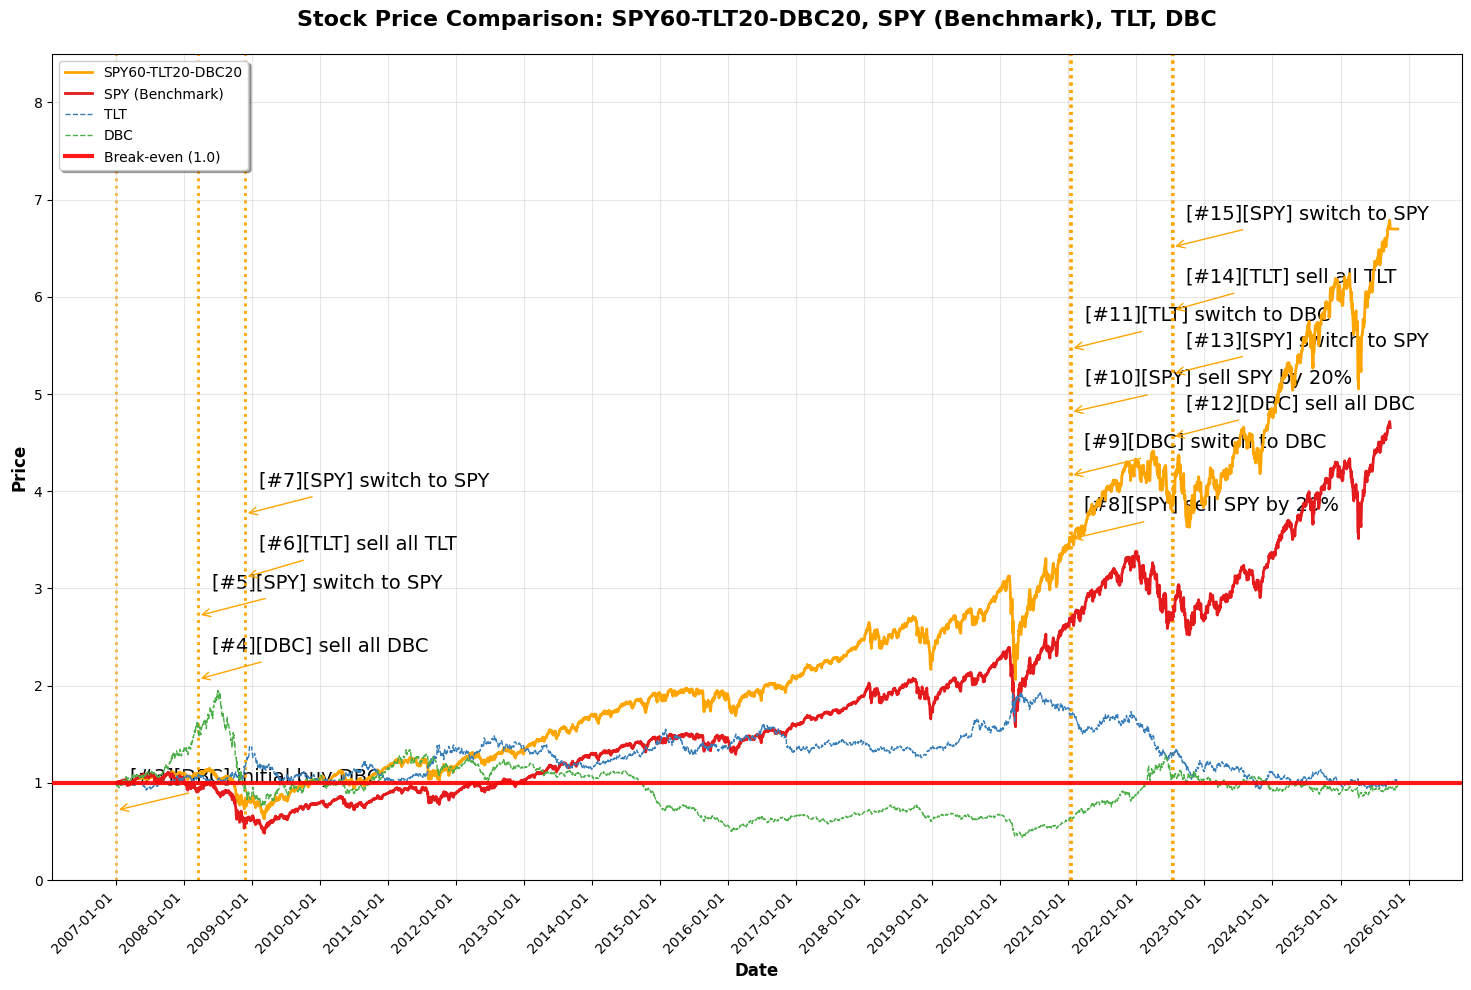

In [13]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol=EQUITY, percentage=-20, date='2021-01-13', desc=f"sell {EQUITY} by 20%"),
                Trade(index=12, symbol="TLT", cash_amount=INF, date='2021-01-14', desc="switch to DBC"),
                Trade(index=13, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=14, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
                Trade(index=15, symbol="TLT", cash_amount=-INF, date='2022-07-13', desc="sell all TLT"),
                Trade(index=16, symbol=EQUITY, cash_amount=INF, date='2022-07-14', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='SPY',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      4244     $141.37    $599974.26   $400025.74   SPY:4244       
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200063.59   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $73.03       DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313841.05   DBC:0           (CLIPPED)
         Adjusted to buy 2348 shares instead ($313763.25)
5   2008-03-18   BUY    SPY      2348     $133.63    $313763.25   $77.80       SPY:6592        (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


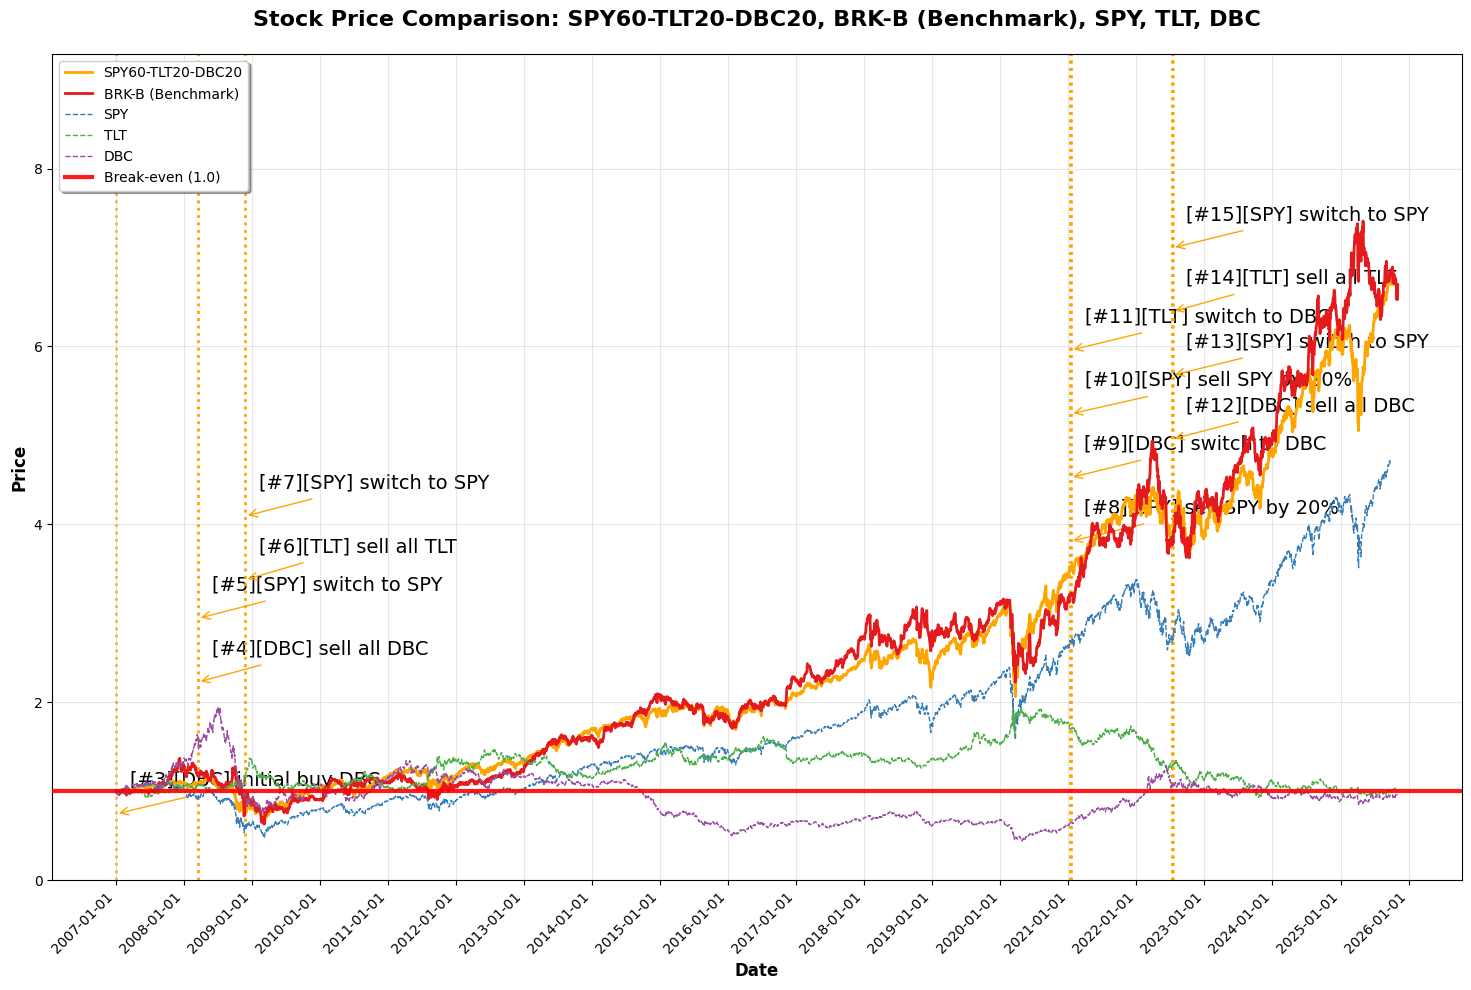

In [14]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol=EQUITY, percentage=-20, date='2021-01-13', desc=f"sell {EQUITY} by 20%"),
                Trade(index=12, symbol="TLT", cash_amount=INF, date='2021-01-14', desc="switch to DBC"),
                Trade(index=13, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=14, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
                Trade(index=15, symbol="TLT", cash_amount=-INF, date='2022-07-13', desc="sell all TLT"),
                Trade(index=16, symbol=EQUITY, cash_amount=INF, date='2022-07-14', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    BRK-B    8234     $72.86     $599929.24   $400070.76   BRK-B:8234     
2   2007-01-03   BUY    TLT      2245     $89.07     $199962.15   $200108.61   TLT:2245       
3   2007-01-03   BUY    DBC      8403     $23.80     $199990.56   $118.05      DBC:8403       
         Adjusted to sell 8403 shares instead
4   2008-03-17   SELL   DBC      8403     $37.34     $313768.02   $313886.07   DBC:0           (CLIPPED)
         Adjusted to buy 3645 shares instead ($313870.95)
5   2008-03-18   BUY    BRK-B    3645     $86.11     $313870.95   $15.12       BRK-B:11879     (CLIPPED)
         Adj

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:566: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


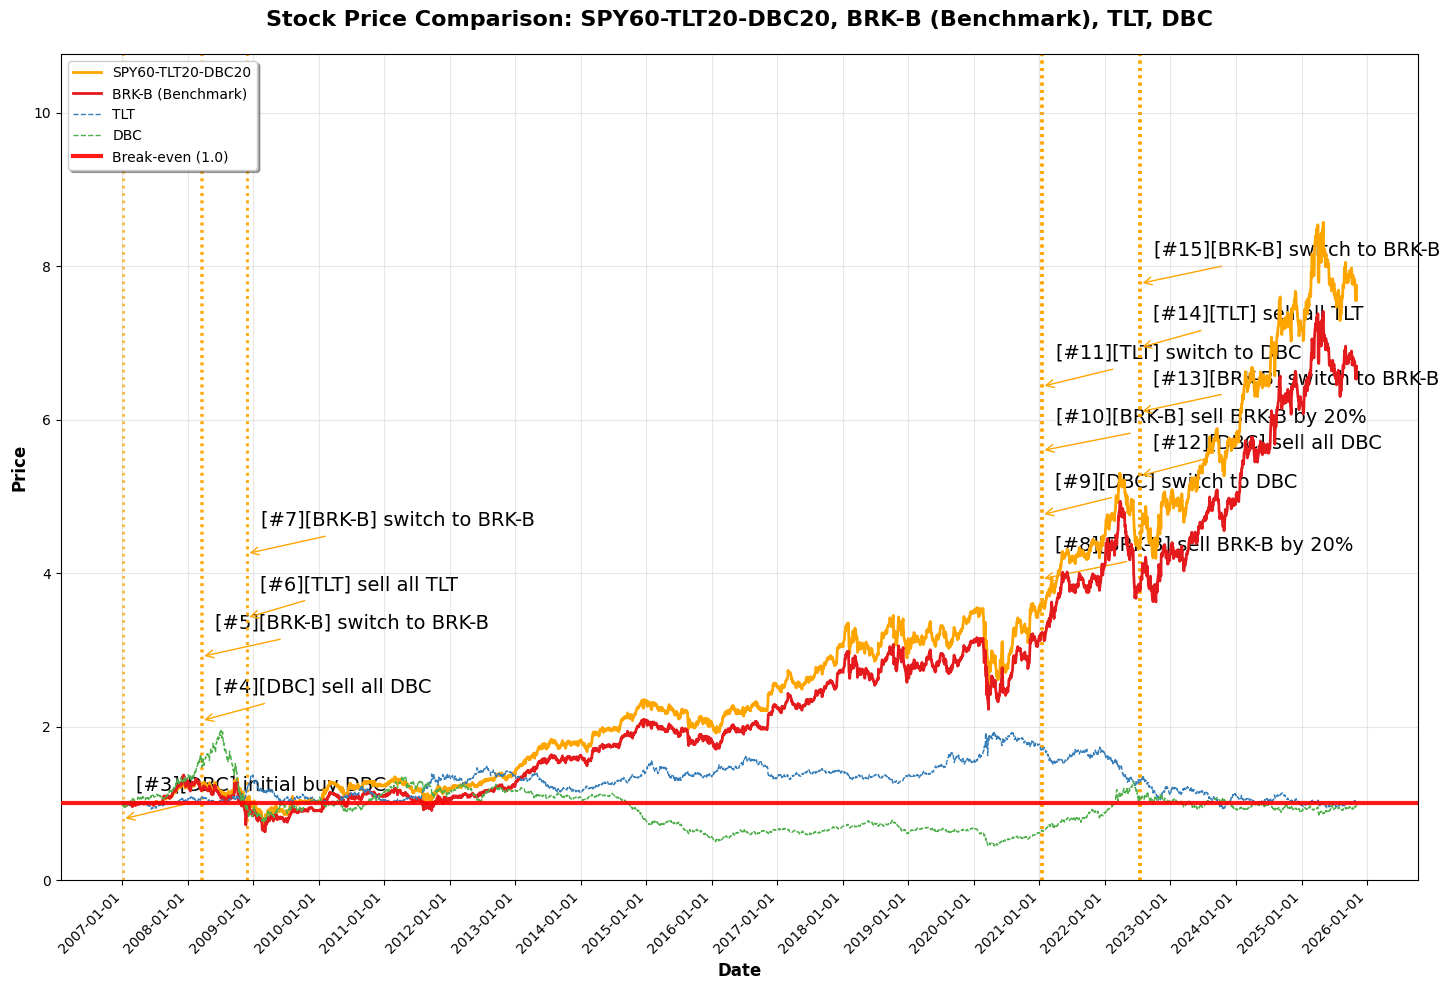

In [15]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol=EQUITY, percentage=-20, date='2021-01-13', desc=f"sell {EQUITY} by 20%"),
                Trade(index=12, symbol="TLT", cash_amount=INF, date='2021-01-14', desc="switch to DBC"),
                Trade(index=13, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=14, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
                Trade(index=15, symbol="TLT", cash_amount=-INF, date='2022-07-13', desc="sell all TLT"),
                Trade(index=16, symbol=EQUITY, cash_amount=INF, date='2022-07-14', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


### Scenario 4: [2007-2025] DCA hedging 60/40 & 1st downturn timing

Trading Strategy:
- In high risk stage, do 60/40 split; In low risk stage, allow portfolio to be equity only.
- When SPY is suspected to be inflated, sell SPY for hedging assets at the half of the inflation stage, if hedging price is low.
- When SPY drops by 20%, start monitoring, if TLT/DBC exhibit risk-avoiding behaviors, switch TLT/DBC to SPY at the first downturn.
- Sell hedging assets with DCA, start selling hedge whenever equity is dropping below 20%. Sell 20% hedge whenever equity drops by 5%

Trading Techniques:
- Hold up to 30% TLT to hedge against asset inflation slow down. Sell at half-way to the optimal timing in 08 Crisis (SPY dropped by 40%, TLT rose by 17%).
- Hold up to 10% DBC (max double) to hedge against high macro-inflation. Sell at half-way optimal timing in 08 Crisis (SPY dropped by 25%, DBC rose by 50%).
- Hold US equity as the main holding. Switch to hedging assets at half-way optimal timing.
- Hold 10% IAU

Learnings:
- SPY does not balance out macro-economic cycles, and is with high volatility. **Portfolio** out performs SPY by 2.31% yearly (591% vs 365% in 18 years).
- BRK-B seems to already be covering some factors to mitigate the macro-economic cycles volatility already, and is . "Portfolio" out performs BRK-B by only 0.19% yearly (591% vs 583% in 18 years).
- To apply the conservative strategy on top of BRK-B (which already adjusted macro cycles). "Portfolio" out performs BRK-B by 1.16% yearly (715% vs 583% in 18 years).

In [ ]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-DBC20",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=600000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=200000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=4, symbol="DBC", cash_amount=200000, date=START_DATE, desc=f"initial buy DBC"),

                *DollarCostAverageStrategy(symbol="DBC", frequency=7, start_date="2007-10-08", percentage=5).get_trades(),

                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-03-17', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-03-18', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-11-24', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-11-25', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-01-11', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-01-12', desc="switch to DBC"),
                Trade(index=11, symbol=EQUITY, percentage=-20, date='2021-01-13', desc=f"sell {EQUITY} by 20%"),
                Trade(index=12, symbol="TLT", cash_amount=INF, date='2021-01-14', desc="switch to DBC"),
                Trade(index=13, symbol="DBC", cash_amount=-INF, date='2022-07-11', desc="sell all DBC"),
                Trade(index=14, symbol=EQUITY, cash_amount=INF, date='2022-07-12', desc=f"switch to {EQUITY}"),
                Trade(index=15, symbol="TLT", cash_amount=-INF, date='2022-07-13', desc="sell all TLT"),
                Trade(index=16, symbol=EQUITY, cash_amount=INF, date='2022-07-14', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='SPY',
    start_date=START_DATE, end_date=END_DATE
)


In [64]:
DollarCostAverageStrategy(symbol="DBC", frequency=7, start_date="2007-10-08", percentage=5).get_trades()

[Trade(index=0, symbol='DBC', date='2007-10-08', volume=None, cash_amount=None, percentage=5, desc='DCA #1: 5% of portfolio in DBC'),
 Trade(index=1, symbol='DBC', date='2007-10-15', volume=None, cash_amount=None, percentage=5, desc='DCA #2: 5% of portfolio in DBC'),
 Trade(index=2, symbol='DBC', date='2007-10-22', volume=None, cash_amount=None, percentage=5, desc='DCA #3: 5% of portfolio in DBC'),
 Trade(index=3, symbol='DBC', date='2007-10-29', volume=None, cash_amount=None, percentage=5, desc='DCA #4: 5% of portfolio in DBC'),
 Trade(index=4, symbol='DBC', date='2007-11-05', volume=None, cash_amount=None, percentage=5, desc='DCA #5: 5% of portfolio in DBC'),
 Trade(index=5, symbol='DBC', date='2007-11-12', volume=None, cash_amount=None, percentage=5, desc='DCA #6: 5% of portfolio in DBC'),
 Trade(index=6, symbol='DBC', date='2007-11-19', volume=None, cash_amount=None, percentage=5, desc='DCA #7: 5% of portfolio in DBC'),
 Trade(index=7, symbol='DBC', date='2007-11-26', volume=None, 